In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

In [2]:
zmin = 2.0
zmax = 2.5
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [3]:
f_Kkappa = get_f_Kkappa()
Lambda = 0.01 # 1 / cMpc, usual cut for HI

In [4]:
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1

# First $<I \kappa>$

In [5]:
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [6]:
Ik = d_delta_integral(f_KLIM_windowed, f_Kkappa)

# Now $<I^{\sf Lo}\kappa>$

In [8]:
ILok = np.zeros((len(ells), len(chibs)), dtype=np.float128)

from tqdm import trange

for chi_idx in trange(len(chibs)):
    chi = chibs[chi_idx]
    f_KLIMLo   = get_f_KILo(external_chi = chi, Lambda=Lambda)
    f_KLIMLo_windowed = apply_window(f_K = f_KLIMLo,
                                     chimin = chimin,
                                     chimax = chimax)
    ILok[:, chi_idx]           = d_chib_integral(f_KLIMLo_windowed, f_Kkappa)

100%|██████████| 64/64 [01:00<00:00,  1.06it/s]


In [9]:
IHi_kappa = Ik - ILok

In [10]:
c1 = plt.cm.rainbow(np.linspace(0, 1, len(ells)))[::-1]
c2 = plt.cm.rainbow(np.linspace(0, 1, len(chibs)))

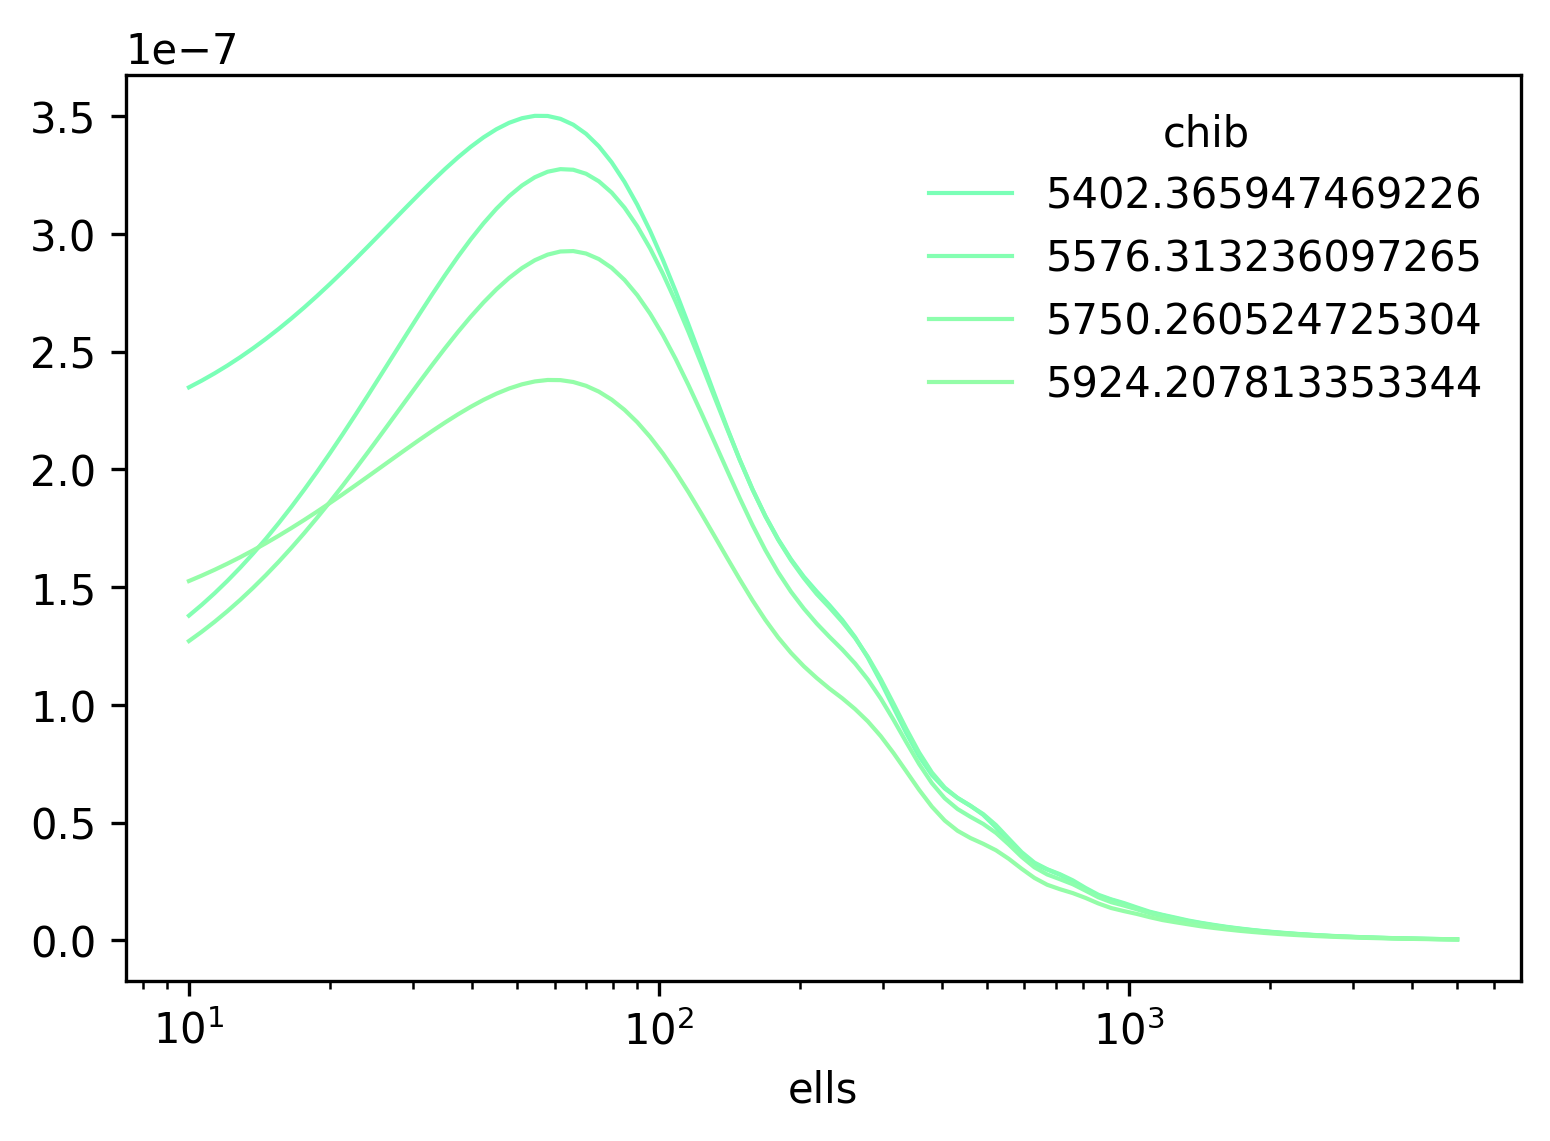

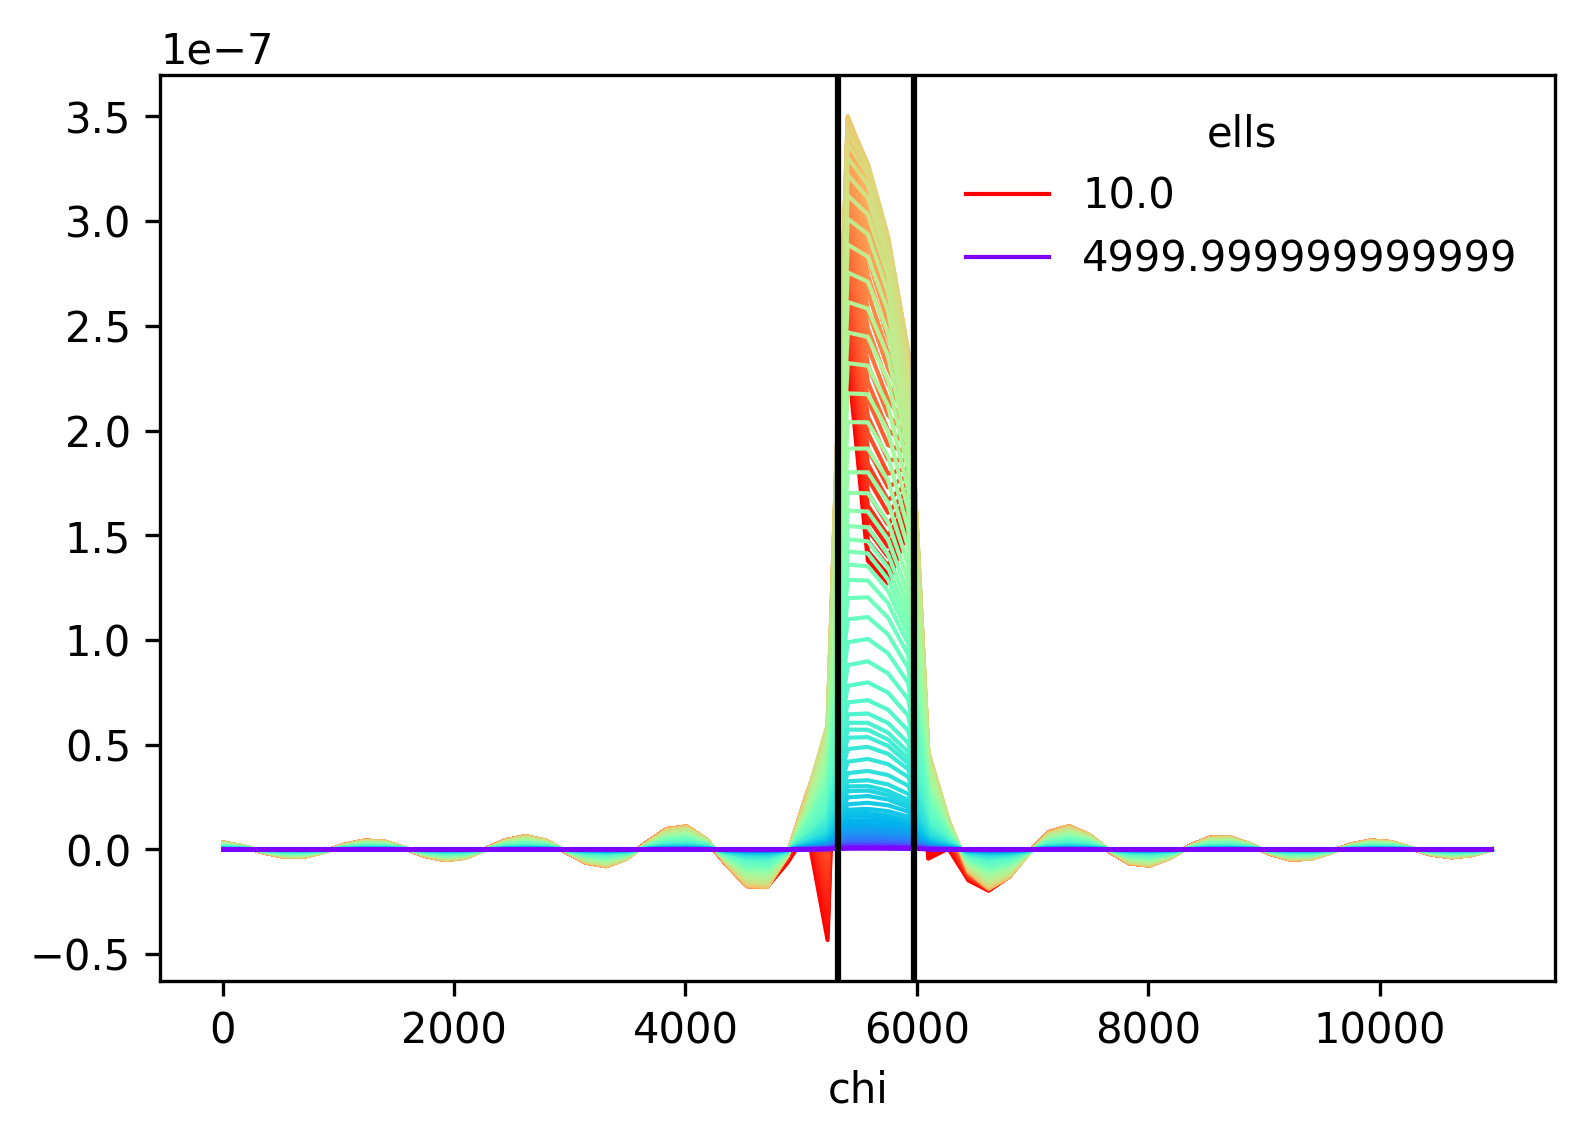

In [12]:
plt.figure(dpi = 300)
for chib_idx, c in enumerate(c2):
    if(chibs[chib_idx] < chimin or chibs[chib_idx] > chimax):
        continue
    plt.plot(ells, 
             IHi_kappa[:,chib_idx],
             lw = 1,
             label=chibs[chib_idx], 
             c=c)
plt.xlabel('ells')
plt.xscale('log')
plt.legend(frameon=False, title='chib')
plt.show()

plt.figure(dpi = 300)

for ell_idx, c in enumerate(c1):
    plt.plot(chibs, 
             IHi_kappa[ell_idx], 
             lw = 1,
             label=ells[ell_idx] if (ell_idx ==0 or ell_idx == len(c1)-1) else None, 
             c=c)
plt.xlabel('chi')
plt.axvline(chimin, c='k')
plt.axvline(chimax, c='k')
plt.legend(frameon=False, title='ells')
plt.show()


In [13]:
from matplotlib import colors


In [16]:
Ik.max()

5.9584385640458925144e-07

/tmp/ipykernel_3100/1050945671.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in cs.collections:


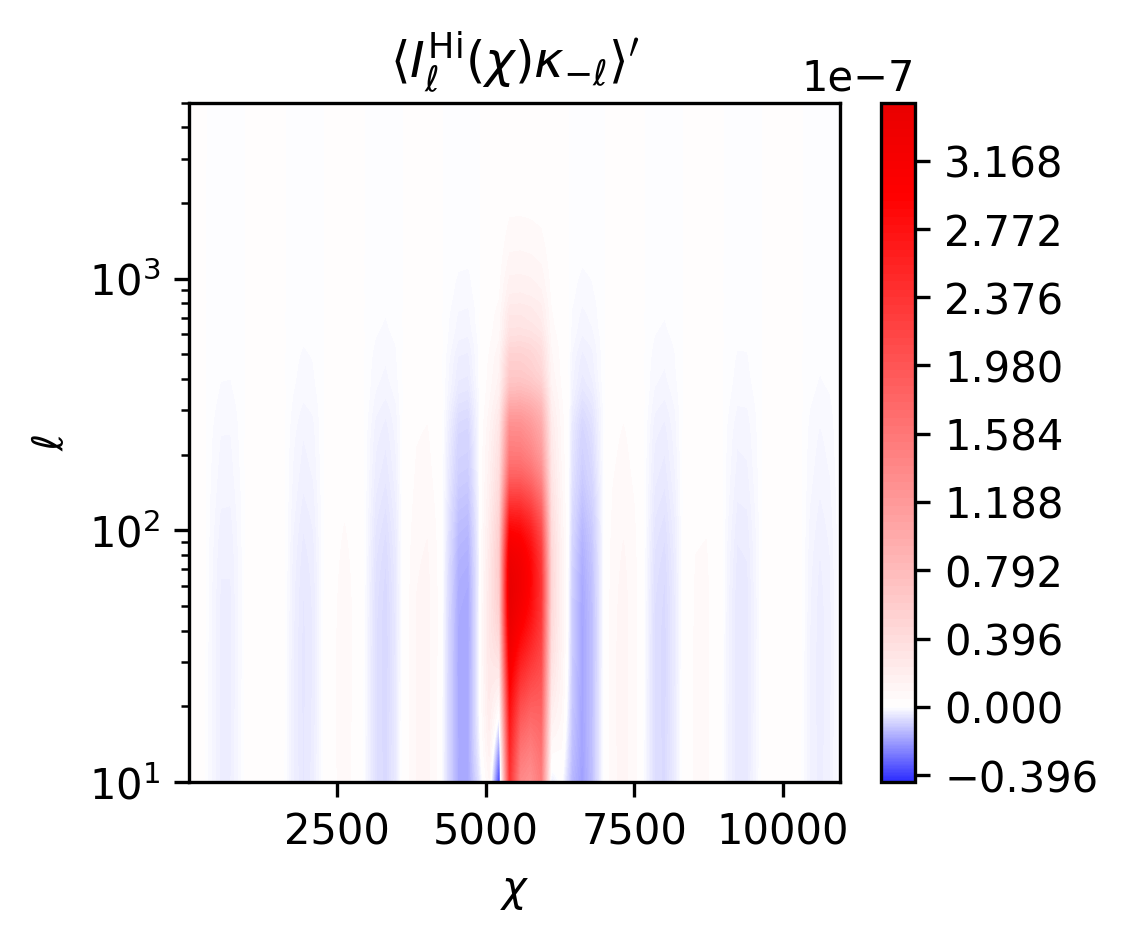

In [15]:

plt.figure(figsize=(3.5,3), dpi=300, facecolor='w',)
cs = plt.contourf(chibs, ells, IHi_kappa, levels=2**10,
                  cmap='seismic',
                  norm=colors.TwoSlopeNorm(vmin=Ik.min(), vcenter=0, vmax=Ik.max()))
plt.yscale('log')
plt.xlabel(r'$\chi$')
plt.ylabel(r'$\ell$')

for c in cs.collections:
    c.set_rasterized(True)


plt.title(r"$\langle I_{ \ell}^{\sf Hi}(\chi) \kappa_{- \ell}\rangle'$")

plt.colorbar()

plt.savefig('figures/002.002.IHikappa.pdf', bbox_inches = 'tight')